<a href="https://colab.research.google.com/github/mereosk/Face_Recognition/blob/main/%CE%9C%CE%B5%CF%81%CE%B5%CF%8C%CF%82_1115201700085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

### Logistic regression & Overfitting

### Plot the sigmoid function $f(x) = 1/(1+e^{-wx}) \hspace{5 mm} x\in[-10,10]$ for 3 different values of variable w=1, w=5, w=100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


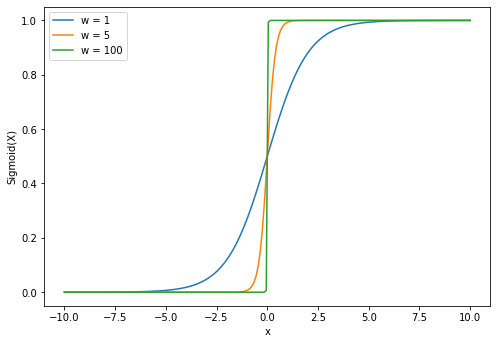

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
plt.rcParams["figure.figsize"] = (8,5.5)

x = np.linspace(-10, 10, 200)
w=1
z = 1/(1 + np.exp(-w*x))
plt.plot(x, z, label = "w = 1")

w=5
z = 1/(1 + np.exp(-w*x))
plt.plot(x, z, label = "w = 5")

w=100
z = 1/(1 + np.exp(-w*x))
plt.plot(x, z, label = "w = 100")

plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.legend()
plt.show()

## Overfitting

As we can see from the above plot, the logistic regression is getting more vertical for larger w values. So it classifies the data too perfectly. The w=100 dimension, separates y=0 from y=1 almost perfectly. Lets illustrate the problem:

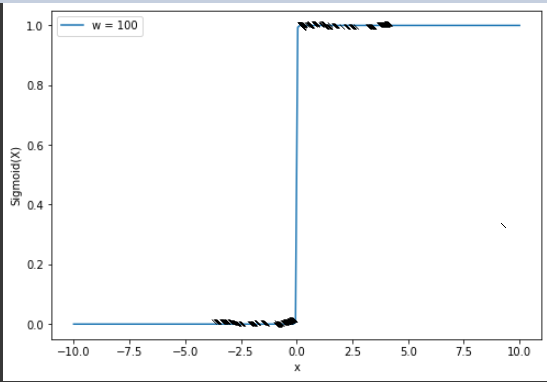

The black dots are the data. All the y=0 values are left of x=0 and all the y=1 are right. This is the definition of overfitting. The reason is the curse of dimensionality

## Solution

The solution i the regularisation of w. We shall use a model that tries to fit the data well, while at the same time trying not to use regression weights that are too large. 

The larger dimensions are predictors in disguise. Thus, I would use the L1 regularisation which tries to keep the total values of the regression wights low.  Another useful property of L1 regularisation is that it often sets many of the regression weights to exactly 0, meaning you can ignore many of your predictors.

We can also use the L2 or ridge regularisation. Both strategies have their own advantages and disadvantages.

# Question 2

### Ridge regression

### Below there is a problem of optimization of the ridge regression model.
### I have to find the closed form solution

$β^* = argmin_β\sum_{i}^Ν(y_i-β^Tx_i)^2+λ\sum_{k=1}^Kβ_k^2 \\ lets\hspace{2 mm} focus \hspace{2 mm}for\hspace{2 mm} a\hspace{2 mm} bit\hspace{2 mm} at\hspace{2 mm} \sum_{i}^Ν(y_i-β^Tx_i)^2 \\ (β^Tx_1-y_1,\hspace{2 mm} β^Tx_2-y_2, \hspace{2 mm} . . ., β^Tx_n-y_n)\left( \begin{array}{ccc}
β^Tx_1-y_1  \\
β^Tx_2-y_2  \\
...         \\
β^Tx_n-y_n  \end{array} \right) \\ β^T(x_1,x_2,...x_n)-(y_1,y_2,...y_n)\hspace{2 mm} where \hspace{2 mm} because\hspace{2 mm} W \in R^m,\hspace{2 mm} X^T\in R^{mxn} \hspace{2 mm}and\hspace{2 mm} Y^T \in R^{mx1} \\ β^* = (β^TΧ^Τ-Υ^Τ)(β^TΧ^Τ-Υ^Τ)^Τ + λβ^Τβ \\ (β^TΧ^Τ-Υ^Τ)(xβ-Y) + λβ^Tβ \\ β^TX^TXβ -Y^TXβ - β^TX^TY+Y^TY+λβ^Tβ \\ β^TX^TXβ+β^TλΙβ - 2β^ΤX^TY \\ β^Τ(Χ^ΤΧ+λΙ)β-2β^ΤX^TY \\ Now \hspace{2 mm}lets\hspace{2 mm} take\hspace{2 mm} the\hspace{2 mm} derivative \\ \frac{\partial β^*}{\partial β} \iff 2(X^TX+λI)β-2X^Ty = 0 \\ (X^TX+λI)β = X^TY \\ β = (X^TX+λI)^{-1}X^TY$



The system has one unique solution when $λ>0$ because $X^TX$ is positive semidefinite, $λI$ is a positive definite so the whole matrix is invertible $\iff$ only one solution

#Question 3
###Face recognition

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
from PIL import Image
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import random

In [217]:
def loadImages(path, set_number):
  images = []
  labels = []

  filelist = glob.glob(path)

  for face in filelist:
    temp_face = face.split("faces/",1)[1]
    # Get the face picture number that determines if the photo will be in the set number
    photo_number_str = temp_face[9:11]
    if photo_number_str[0] == "0":
        photo_number_str = photo_number_str[1]
    photo_number = int(photo_number_str)

    # Get the number of the person and insert it in an array
    person_number_str = temp_face[6:8]
    if person_number_str[0] == "0":
        person_number_str = person_number_str[1]
    person_number = int(person_number_str)

    flag = False

    if set_number == 'Set_01' and photo_number in range(1,8):
      flag = True
    elif set_number == 'Set_02' and photo_number in range(8,20):
      flag = True
    elif set_number == 'Set_03' and photo_number in range(20,32):
      flag = True
    elif set_number == 'Set_04' and photo_number in range(32,46):
      flag = True
    elif set_number == 'Set_05' and photo_number in range(46,65):
      flag = True
    
    if flag:
      # print(photo_number_str)
      img = np.array(Image.open(face))
      # The images are 50X50 pixels, we need the to be 2500 so reshape them
      img = img.reshape(img.shape[0]*img.shape[1])

      images.append(img)
      labels.append(person_number)

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

# Load all the images and insert them in the suitable set
images1, labels1 = loadImages('/content/drive/My Drive/faces/*', 'Set_01')
images2, labels2 = loadImages('/content/drive/My Drive/faces/*', 'Set_02')
images3, labels3 = loadImages('/content/drive/My Drive/faces/*', 'Set_03')
images4, labels4 = loadImages('/content/drive/My Drive/faces/*', 'Set_04')
images5, labels5 = loadImages('/content/drive/My Drive/faces/*', 'Set_05')

## Standardization

###  In machine learning, it is very necessary for the data to have the same scale in terms of the Feature to avoid bias in the outcome, thus we use **preprocessing**.

### By using standardization wetend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

In [218]:
# Standardize the data from all the datasets

# This variable is used for different scaling methods. First one is the correct
# second one has the best accuracies
scaling = 1

if scaling == 1:
  scale = StandardScaler()
  all_images = np.vstack((images1, images2, images3, images4, images5))
  scale.fit(all_images)
  standardized_images1 = scale.transform(images1)
  standardized_images2 = scale.transform(images2)
  standardized_images3 = scale.transform(images3)
  standardized_images4 = scale.transform(images4)
  standardized_images5 = scale.transform(images5)
else:
  scale = StandardScaler()
  standardized_images1 = scale.fit_transform(images1)
  standardized_images2 = scale.fit_transform(images2)
  standardized_images3 = scale.fit_transform(images3)
  standardized_images4 = scale.fit_transform(images4)
  standardized_images5 = scale.fit_transform(images5)

## Dimensionality Reduction using PCA

### We have total of 2500 features in the training set and in the testing set, and we will reduce them to 9 and 30 using PCA

In [219]:
# Perform the dimensional reduction to all the sets
n_components9 = 9
n_components30 = 30

# For 9 dimensions
pca9 = PCA(n_components = n_components9, svd_solver ='randomized', whiten = True).fit(standardized_images1)

eigenfaces = pca9.components_.reshape((n_components9, 50, 50))

X_train1_pca_9 = pca9.transform(standardized_images1)

X_train2_pca_9 = pca9.transform(standardized_images2)

X_train3_pca_9 = pca9.transform(standardized_images3)

X_train4_pca_9 = pca9.transform(standardized_images4)

X_train5_pca_9 = pca9.transform(standardized_images5)

# For 30 dimensions
pca30 = PCA(n_components = n_components30, svd_solver ='randomized', whiten = True).fit(standardized_images1)

X_train1_pca_30 = pca30.transform(standardized_images1)

X_train2_pca_30 = pca30.transform(standardized_images2)

X_train3_pca_30 = pca30.transform(standardized_images3)

X_train4_pca_30 = pca30.transform(standardized_images4)

X_train5_pca_30 = pca30.transform(standardized_images5)


## Train and the model using the KNN classifier

### I train the model using the set 1
### Then I identify the faces using as testing all the sets with different dimensions

In [220]:
model = KNeighborsClassifier(n_neighbors=1)
# Train the model using as training set the set 1 whose dimensions were reduced to 9
model.fit(X_train1_pca_9, labels1)

KNeighborsClassifier(n_neighbors=1)

In [221]:
# Test Output with d=9
predicted_set1_d9 = model.predict(X_train1_pca_9)
predicted_set2_d9 = model.predict(X_train2_pca_9)
predicted_set3_d9 = model.predict(X_train3_pca_9)
predicted_set4_d9 = model.predict(X_train4_pca_9)
predicted_set5_d9 = model.predict(X_train5_pca_9)


# Print the accuracies
print("Dimension = 9")
print("Testing set 1, accuracy: ", metrics.accuracy_score(labels1, predicted_set1_d9))
print("Testing set 2, accuracy: ", metrics.accuracy_score(labels2, predicted_set2_d9))
print("Testing set 3, accuracy: ", metrics.accuracy_score(labels3, predicted_set3_d9))
print("Testing set 4, accuracy: ", metrics.accuracy_score(labels4, predicted_set4_d9))
print("Testing set 5, accuracy: ", metrics.accuracy_score(labels5, predicted_set5_d9))

Dimension = 9
Testing set 1, accuracy:  1.0
Testing set 2, accuracy:  0.95
Testing set 3, accuracy:  0.625
Testing set 4, accuracy:  0.2857142857142857
Testing set 5, accuracy:  0.13157894736842105


In [222]:
# Train the model using as training set the set 1 whose dimensions were reduced to 30
model.fit(X_train1_pca_30, labels1)

KNeighborsClassifier(n_neighbors=1)

In [223]:
# Test Output with d=30
predicted_set1_d30 = model.predict(X_train1_pca_30)
predicted_set2_d30 = model.predict(X_train2_pca_30)
predicted_set3_d30 = model.predict(X_train3_pca_30)
predicted_set4_d30 = model.predict(X_train4_pca_30)
predicted_set5_d30 = model.predict(X_train5_pca_30)

# Print the accuracies
print("Dimension = 30")
print("Testing set 1, accuracy: ", metrics.accuracy_score(labels1, predicted_set1_d30))
print("Testing set 2, accuracy: ", metrics.accuracy_score(labels2, predicted_set2_d30))
print("Testing set 3, accuracy: ", metrics.accuracy_score(labels3, predicted_set3_d30))
print("Testing set 4, accuracy: ", metrics.accuracy_score(labels4, predicted_set4_d30))
print("Testing set 5, accuracy: ", metrics.accuracy_score(labels5, predicted_set5_d30))

Dimension = 30
Testing set 1, accuracy:  1.0
Testing set 2, accuracy:  0.9416666666666667
Testing set 3, accuracy:  0.9416666666666667
Testing set 4, accuracy:  0.65
Testing set 5, accuracy:  0.2736842105263158


The furthest we go from the set1 the accuracy lowers. If we check the images we can undrestand why that happens. Photos closest to 0, of a person, are more luminus whereas the ones closest to 64 are pitch dark. Also photos that are close one another are almost identical.

## Plot the 9 top eigenvectors

In [224]:
# This funciton helps me plot the images
def plot_gallery(images, titles, height, width, n_row=3, n_col=3):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

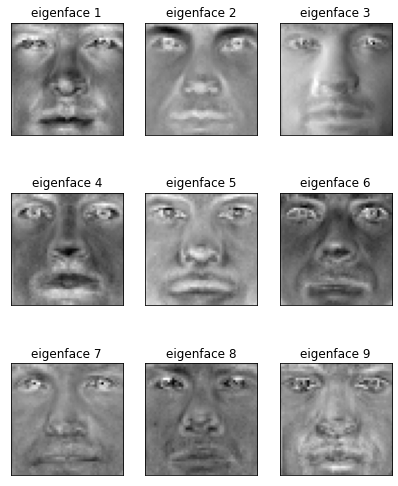

In [225]:
titles = []
for i in range(eigenfaces.shape[0]):
  titles.append("eigenface %d" % (i+1))

plot_gallery(eigenfaces, titles, 50, 50)
plt.show()

Reconstruct 1 random image from every Set

In [226]:
# This function takes an array of sets with images that were transformed , an array 
# of sets with the starting images and the pca. Then it picks randomlly an image
# from every set and it print the reconstructed image right beside the starting img
def reconstruct(pca_data, starting_data, pca):
  for i in range(5):
      random_idx = random.randint(0, pca_data[i].shape[0]-1)
      tgt = pca_data[i][random_idx]
      # Inverse the pca 
      inv_pca = pca.inverse_transform(tgt)
      # Inverse standardization
      inv_standar = scale.inverse_transform([inv_pca])

      created_img = np.reshape(inv_standar[0], (50, 50))
      starting_img = np.reshape(starting_data[i][random_idx], (50, 50))

      plt.figure(figsize=(5, 2.5))
      plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
      plt.subplot(1, 2, 1)
      plt.imshow(created_img, cmap=plt.cm.gray)
      plt.title("Reconstructed image from set {}".format(i+1), size=12)
      plt.xticks(())
      plt.yticks(())
      plt.subplot(1, 2, 2)
      plt.imshow(starting_img, cmap=plt.cm.gray)
      plt.title("Starting image from set {}".format(i+1), size=12)
      plt.xticks(())
      plt.yticks(())

      plt.show()

Performing reconstruction for d=9


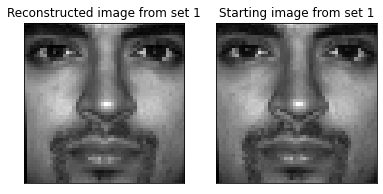

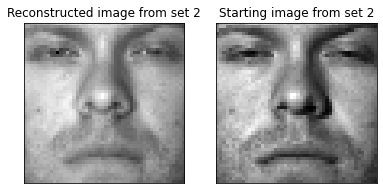

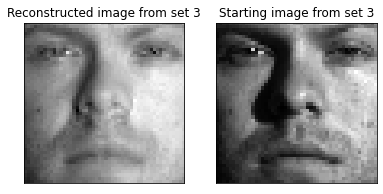

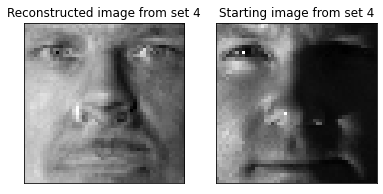

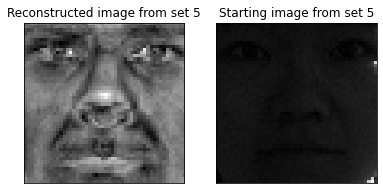

In [227]:
# Append all the set to arrays in order too loop through them
pca_data9 = []
pca_data30 = []
start_data = []

pca_data9.append(X_train1_pca_9)
pca_data9.append(X_train2_pca_9)
pca_data9.append(X_train3_pca_9)
pca_data9.append(X_train4_pca_9)
pca_data9.append(X_train5_pca_9)

pca_data30.append(X_train1_pca_30)
pca_data30.append(X_train2_pca_30)
pca_data30.append(X_train3_pca_30)
pca_data30.append(X_train4_pca_30)
pca_data30.append(X_train5_pca_30)

start_data.append(images1)
start_data.append(images2)
start_data.append(images3)
start_data.append(images4)
start_data.append(images5)

print("Performing reconstruction for d=9")
reconstruct(pca_data9, start_data, pca9)



Performing reconstruction for d=30


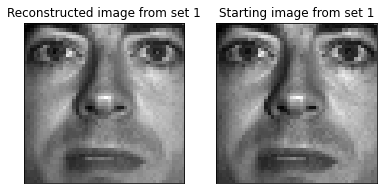

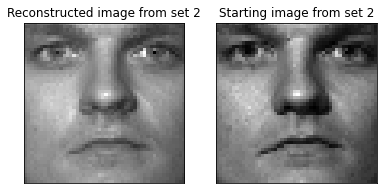

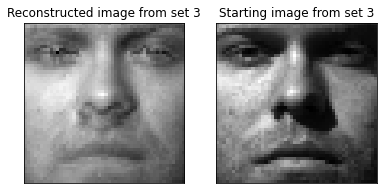

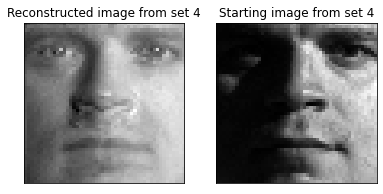

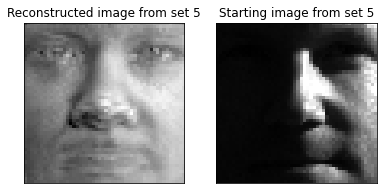

In [228]:
print("Performing reconstruction for d=30")
reconstruct(pca_data30, start_data, pca30)

We can see that the quality of the images with d=30 is better than d=9. The reason is that with d=9 the images loses a lot of quality which cannot be restored by reconstructing the photo. Also the best quality is in the first sets because the images have a lot of similarities with the training set(Set 1).
Lastly we observe that sometimes the images differ (reconstructed vs starting). That is because of the accuracy.